# Data Analysis

##### Import libraries

In [774]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplot graph won't pop up
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Load Data Set

In [775]:
my_data = pd.read_csv('/Users/deborabastos/Documents/3.DataScience/accenture_data_analytics/data/my_data.csv')
my_data

,Content ID,Reaction Type,Datetime,User ID (Post owner),Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,positive,30.0
...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,10.0
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,45.0
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,positive,30.0
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,negative,12.0


##### Group by Category and sort by popularity

In [776]:
total_categories = my_data.groupby(by = 'Category', as_index= False)['Score'].sum()
total_categories_sort = total_categories.sort_values("Score", ascending=False)
total_categories_sort

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0
2,culture,66579.0
14,travel,64880.0
1,cooking,64756.0
10,soccer,57783.0
4,education,57436.0


##### Select 5 most popular categories

In [777]:
pop_categories = total_categories_sort[0:5]
pop_categories

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0


##### Plot 5 most popular categories

<AxesSubplot:xlabel='Score', ylabel='Category'>

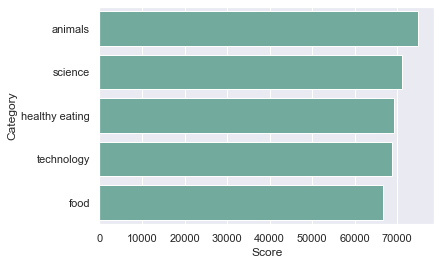

In [778]:
plt.figure(figsize=(6,4))
sns.barplot(data = pop_categories, y = 'Category', x = 'Score',
            order = pop_categories.sort_values('Score', ascending = False).Category,
            color='#69b3a2')

# All categories:
# sns.barplot(data = total_categories_sort, y = 'Category', x = 'Score')

##### Group by Content Type and sort by popularity

In [779]:
pop_content = my_data.groupby(by = 'Content Type', as_index= False)['Score'].sum()
pop_content_sort = pop_content.sort_values("Score", ascending=False)
pop_content_sort


,Content Type,Score
2,photo,262838.0
3,video,246463.0
0,GIF,238217.0
1,audio,226127.0


##### Plot Content by popularity

<AxesSubplot:xlabel='Content Type', ylabel='Score'>

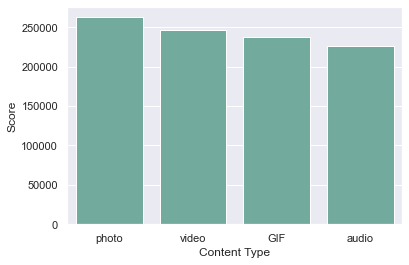

In [780]:
plt.figure(figsize=(6,4))
sns.barplot(data = pop_content_sort, x = 'Content Type', y = 'Score',
            color='#69b3a2')

##### Group by Content Type and sort by NUMBER of reactions

In [781]:
n_content = my_data.groupby(by = 'Content Type', as_index= False)['Score'].count()
n_content.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_content_sort = n_content.sort_values("Reactions count", ascending=False)
n_content_sort


,Content Type,Reactions count
2,photo,6589
3,video,6245
0,GIF,6079
1,audio,5660


##### Plot Content Type by NUMBER of reactions

<AxesSubplot:xlabel='Content Type', ylabel='Reactions count'>

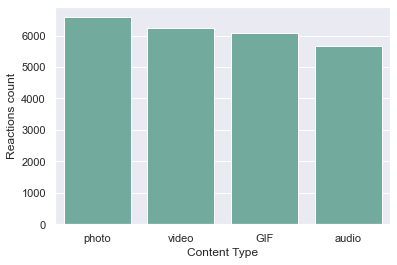

In [782]:
plt.figure(figsize=(6,4))
sns.barplot(data = n_content_sort, x = 'Content Type', y = 'Reactions count',
            color='#69b3a2')

##### Group by Sentiments and sort by NUMBER of reactions

In [783]:
n_sentiment = my_data.groupby(by = 'Sentiment', as_index= False)['Score'].count()
n_sentiment.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_sentiment_sort = n_sentiment.sort_values("Reactions count", ascending=False)
n_sentiment_sort

,Sentiment,Reactions count
2,positive,13807
0,negative,7695
1,neutral,3071


##### Plot Sentiments by NUMBER of reactions

<AxesSubplot:xlabel='Sentiment', ylabel='Reactions count'>

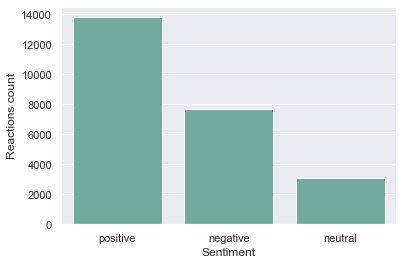

In [784]:
plt.figure(figsize=(6,4))
sns.barplot(data = n_sentiment_sort, x = 'Sentiment', y = 'Reactions count',
            color='#69b3a2')

##### Group by Reaction Type and sort by NUMBER of reactions

In [785]:
n_reaction_type = my_data.groupby(by = 'Reaction Type', as_index= False)['Score'].count()
n_reaction_type.rename(columns = {'Score':'Reactions count'}, inplace = True)
n_reaction_type_sort = n_reaction_type.sort_values("Reactions count", ascending=False)
n_reaction_type_sort

,Reaction Type,Reactions count
5,heart,1622
12,scared,1572
11,peeking,1559
4,hate,1552
7,interested,1549
0,adore,1548
3,dislike,1548
14,want,1539
10,love,1534
2,disgust,1526


##### Plot Reaction Type by NUMBER of reactions

<AxesSubplot:xlabel='Reaction Type', ylabel='Reactions count'>

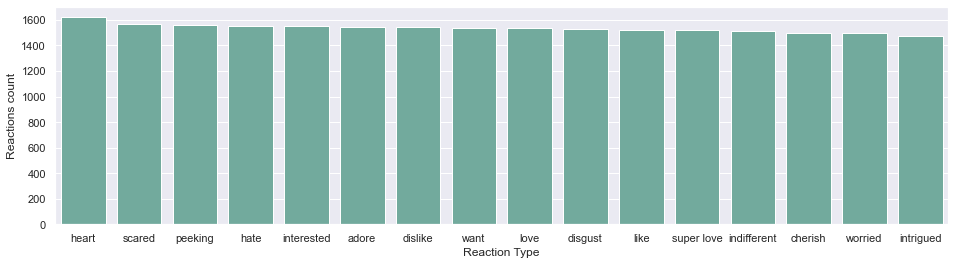

In [786]:
plt.figure(figsize=(16,4))
sns.barplot(data = n_reaction_type_sort, x = 'Reaction Type', y = 'Reactions count',
            color='#69b3a2')

##### Categories by Reaction Type count

In [805]:
# Fazer mapa de calor por linha???

pt_reaction_type = pd.pivot_table(data=my_data, index="Category", columns="Reaction Type", aggfunc='count')
pt_reaction_type['Content ID']

Reaction Type,adore,cherish,disgust,dislike,hate,heart,indifferent,interested,intrigued,like,love,peeking,scared,super love,want,worried
Category,,,,,,,,,,,,,,,,
animals,114,125,122,115,128,120,100,110,116,101,119,129,132,123,122,121
cooking,106,84,109,115,104,112,81,125,88,114,99,101,120,110,94,102
culture,95,113,98,112,94,97,111,110,101,97,108,99,117,100,122,102
dogs,81,72,87,84,87,97,93,91,70,93,73,92,89,84,83,62
education,83,87,73,91,96,91,89,88,96,90,105,99,80,92,83,90
fitness,96,73,96,95,71,83,82,81,82,111,88,86,96,100,72,83
food,93,119,107,106,130,107,97,108,94,100,123,115,101,89,110,100
healthy eating,122,105,103,101,121,114,108,101,107,106,103,104,100,116,111,95
public speaking,76,65,69,82,61,88,77,75,92,74,85,65,75,76,81,76


<AxesSubplot:xlabel='Reaction Type', ylabel='Category'>

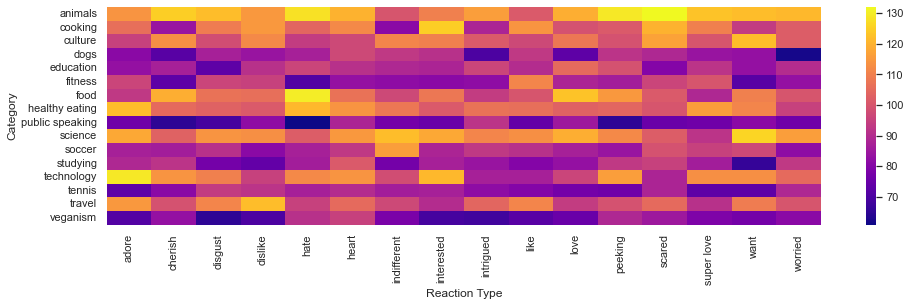

In [812]:
plt.figure(figsize=(16,4))
sns.heatmap(data=pt_reaction_type['Content ID'],
            cmap = "plasma")

##### Group by content

In [788]:
total_content = my_data.groupby(["Content ID", "Category"]).sum("Score")

In [789]:
# Sort by most popular content
total_content.sort_values("Score", ascending=False)

,,Score
Content ID,Category,
292051b5-b835-4a60-962a-bddf10da82bd,technology,2273.0
697af362-e84b-4429-b4ea-4123c6ab44ba,science,2231.0
4dd4da35-453e-466d-95ca-b1a7710fac1f,technology,2223.0
cd568dd1-70cf-45d6-b495-10eebff8c920,dogs,2222.0
31d142d9-4557-4613-bce5-cfe63cd0a3cf,soccer,2164.0
...,...,...
7e9865ec-7455-4b39-89f7-92e2a82d0f12,education,10.0
88e43f42-027e-4256-bab4-2d1c2b6f8f67,education,5.0
48fd48c7-bc82-414e-8941-aa2090183aec,dogs,5.0


In [790]:
# Check if total score is the same for total_categories and total_contet 
total_categories['Score'].sum()

973645.0

In [791]:
total_content['Score'].sum()

973645.0

In [792]:
# Checking 
my_data.groupby(["Content ID", "Category", "Sentiment"])[["Sentiment"]].count()

Sentiment
Content ID                           Category       Sentiment           
004e820e-49c3-4ba2-9d02-62db0065410c tennis         positive           1
00d0cdf9-5919-4102-bf84-ebde253c3cd2 healthy eating negative          13
                                                    neutral            4
                                                    positive          29
01396602-c759-4a17-90f0-8f9b3ca11b30 tennis         negative          15
...                                                                  ...
fea9077f-2fe7-43bd-aaef-dc2619988d94 culture        neutral            3
                                                    positive           2
ff883828-a610-492d-8635-8a777eaad25f education      negative          16
                                                    neutral           10
                                                    positive          22

[2710 rows x 1 columns]

In [793]:
# Verificar reações no tempo. Dia de semana? horário? Manhã, Tarde, Noite?
# 